In [109]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

# Science plot package + Dracula theme
plt.style.use(['science', 'dark_background'])
plt.rcParams['axes.facecolor'] = '#282a36'
plt.rcParams['figure.facecolor'] = '#282a36'
colorcycle = ['#8be9fd', '#ff79c6', '#50fa7b', '#bd93f9', '#ffb86c', '#ff5555', '#f1fa8c', 
'#6272a4']
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorcycle)
white = '#f8f8f2' # foreground

# change dpi
plt.rcParams['figure.dpi'] = 512

## Problem 2

The 'method':
- First we assume that the embryo long body axis is parallel to the $y$ axis (although it most definitely is not)
- For the embryo 2 image, we need to remove the artifact in the top right corner, so I just did this manually by
    turning the 500x500 pixels at the corner to black in both the Black and white channel (bw channel) and the RGB channel.
- Then we crop the image at the top and bottom bounds of where the embryo is located. Here we 
    assume an arbitrary threshold of 60 (0 means black and 255 means white) that identifies the 
    bounds the best. 
- Now for each row of pixels we can find the left and right bounds (so we can ignore the black space) of the embryo and take the mean 
    value of the green channel. 
- In addition, we can calculate the error bars by finding the standard deviation of the average green value 
    at each row:
$$ \sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2} $$

(2810, 2719, 3)
(2810, 2719, 3)
163 2617


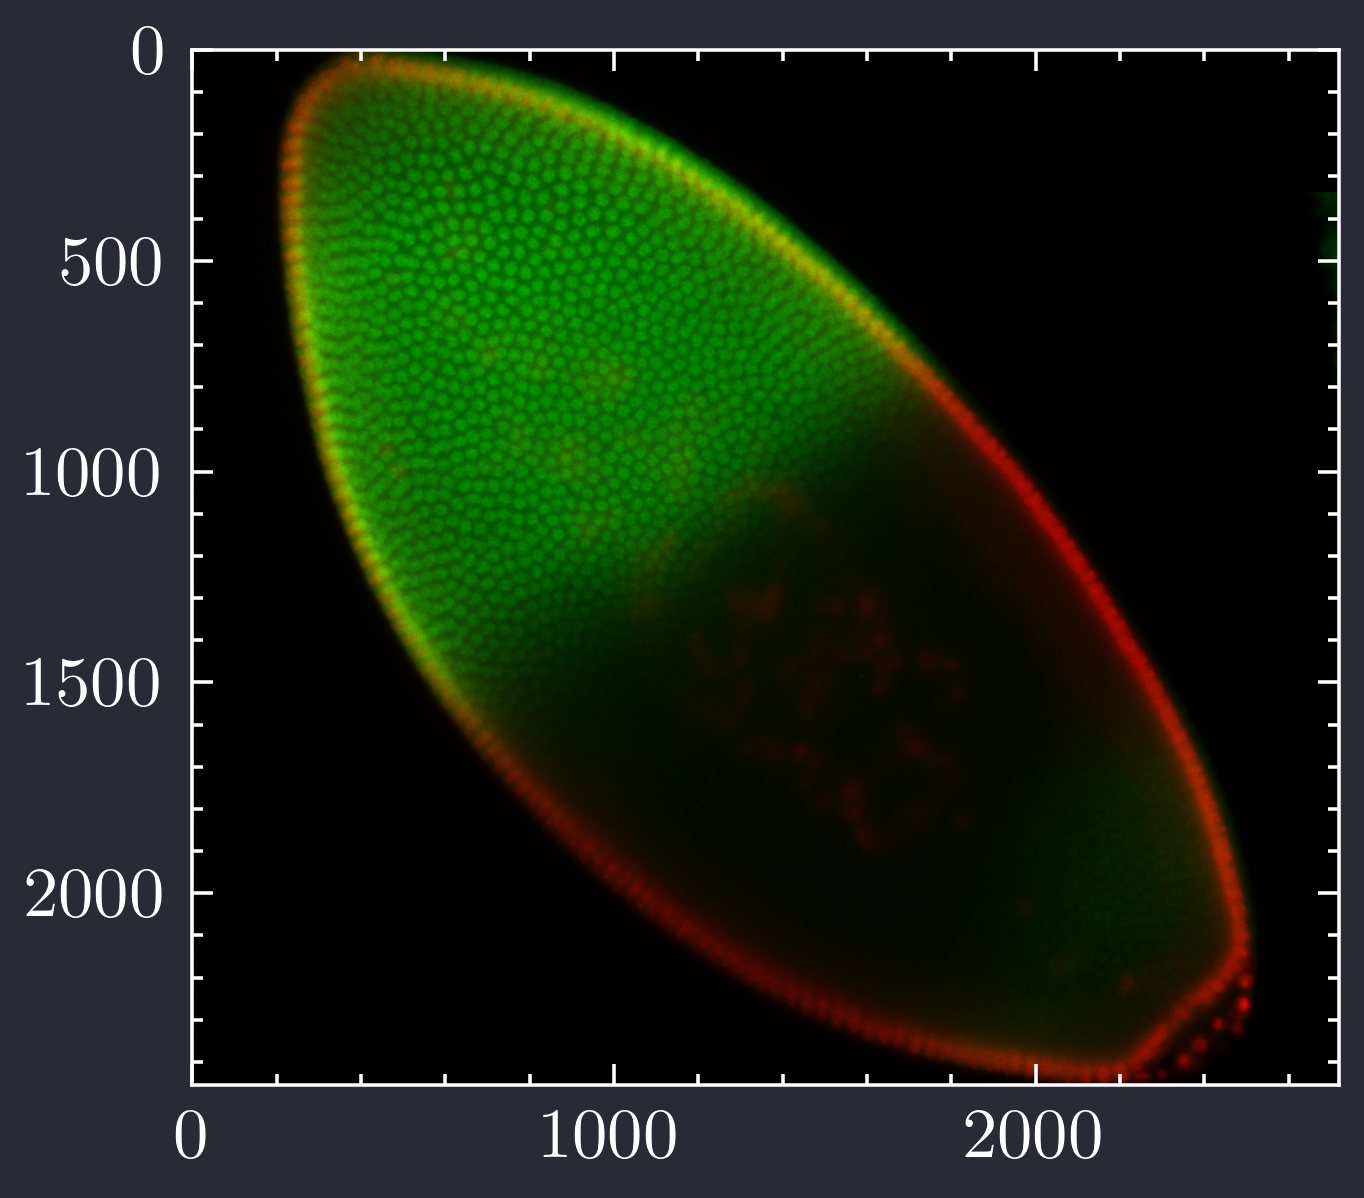

In [110]:
import cv2 as cv

# load image
img_1rgb = cv.imread('../images/hw3_images/emb1_rgb.tif')
img_1bw = cv.imread('../images/hw3_images/emb1_2c.tif')

# image dimensions
print(img_1rgb.shape) # (height, width, channels)
print(img_1bw.shape) # (height, width, channels

# convert top right corner 500x500 to black
img_1rgb[:500, -500:] = 0 
img_1bw[:500, -500:] = 0 

# Opencv uses BGR, convert to RGB
rgb_image = cv.cvtColor(img_1rgb, cv.COLOR_BGR2RGB)

# 2 channel image 
# Define a threshold for identifying top and bottom bounds
threshold = 60  # Adjust as needed

# finding the top and bottom bounds for cell
top_bound = None
bottom_bound = None
for row in range(img_1bw.shape[0]):
    for col in range(img_1bw.shape[1]):
        if img_1bw[row, col, 0] > threshold:
            if top_bound is None:
                top_bound = row
            bottom_bound = row
print(top_bound, bottom_bound)
# Crop the image to the bounds
cropped_image = rgb_image[top_bound:bottom_bound, :]
plt.imshow(cropped_image)

In [111]:
print(img_1bw.shape)
print(img_1bw[334, 433, 0])


(2810, 2719, 3)
29


In [112]:
# # Array to store left and right bounds for each row
bounds = []

# Iterate through each row to find the left and right bounds
for row in range(top_bound, bottom_bound):
    # Find left and right bounds for the current row
    left_bound = None
    right_bound = None
    for col in range(img_1bw.shape[1]):
        # check if white in left and right bounds
        if img_1bw[row, col][0] > threshold:
            if left_bound is None:
                left_bound = col
    for col in range(img_1bw.shape[1]-1, -1, -1):
        if img_1bw[row, col][0] > threshold:
            if right_bound is None:
                right_bound = col
    bounds.append((left_bound, right_bound))
# bounds to numpy array
bounds = np.array(bounds)
# print(bounds)
# delete first element
bounds = bounds[1:]
# print(bounds)

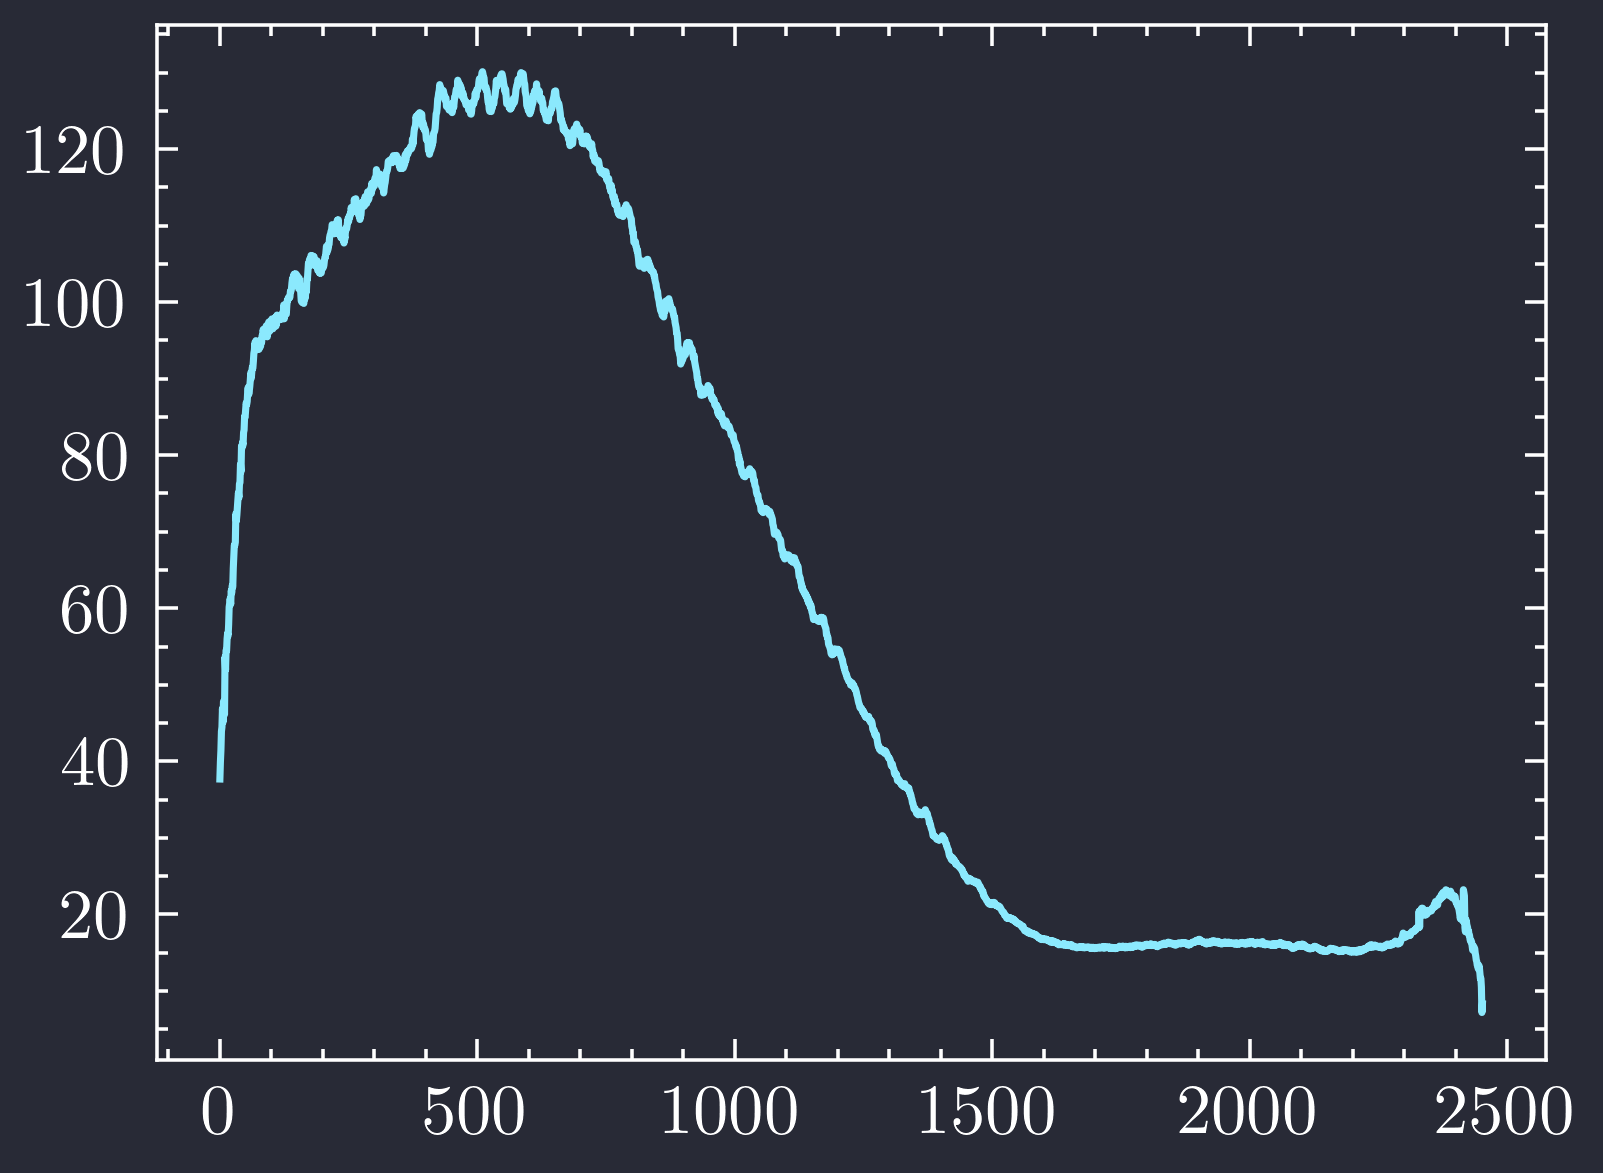

In [113]:
green_channel = rgb_image[:, :, 1]
# Calculate the average green value within the bounds for each row
average_green_values = []
i = 0
for row in range(top_bound, bottom_bound-1):
    left_bound, right_bound = bounds[i]
    average_green_values.append(np.mean(green_channel[row, left_bound:right_bound]))
    i += 1
    
# Plot the average green values
plt.plot(average_green_values)
plt.show()

(3682, 1992, 3)
(3682, 1992, 3)
197 3483


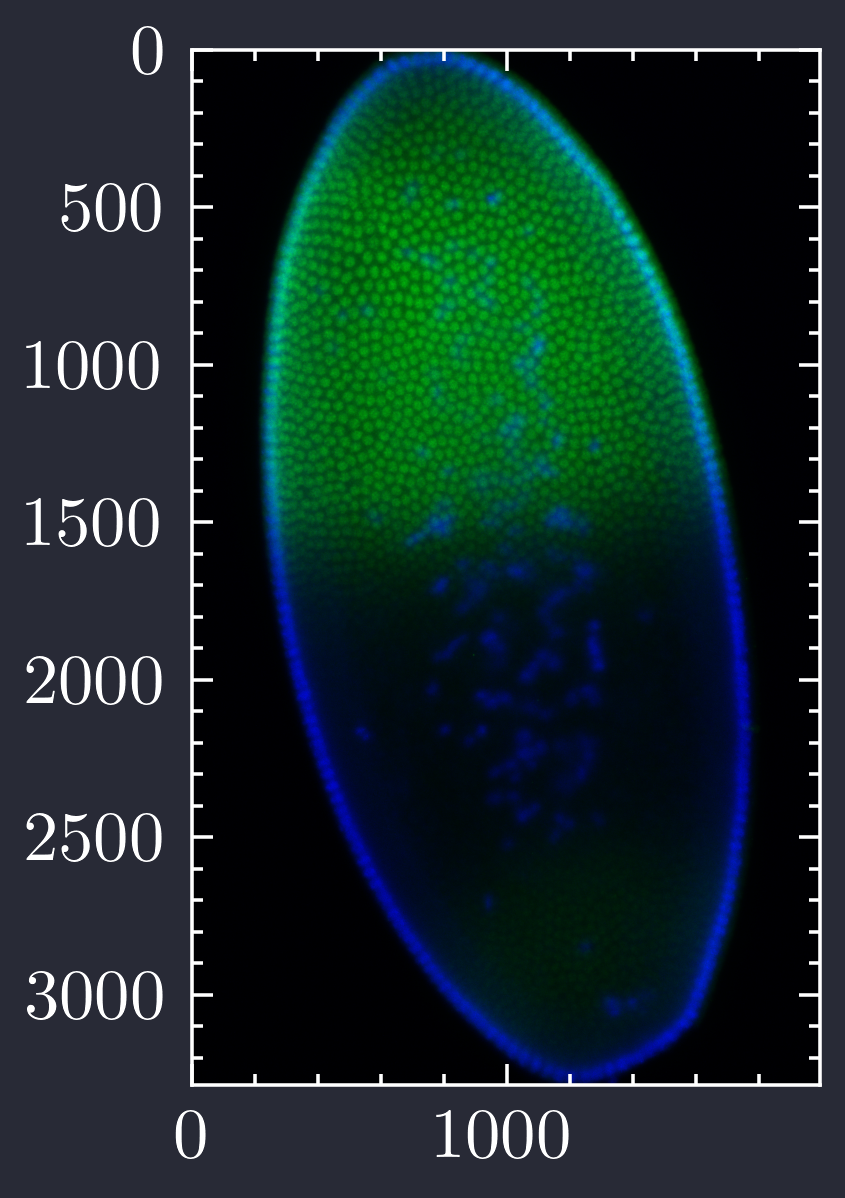

In [114]:
img_2bw = cv.imread('/Users/junseo/washu/spring2024/phys481/images/hw3_images/emb2_2c.tif')
img_2rgb = cv.imread('/Users/junseo/washu/spring2024/phys481/images/hw3_images/emb2_rbg.tif')

# image dimensions
print(img_2rgb.shape) # (height, width, channels)
print(img_2bw.shape) # (height, width, channels
# threshold for identifying top and bottom bounds
threshold2 = 100  # Adjust as needed

# finding the top and bottom bounds for cell
top_bound2 = None
bottom_bound2 = None
for row in range(img_2bw.shape[0]):
    for col in range(img_2bw.shape[1]):
        if img_2bw[row, col, 2] > threshold2:
            if top_bound2 is None:
                top_bound2 = row
            bottom_bound2 = row
print(top_bound2, bottom_bound2)
# Crop the image to the bounds
cropped_image2 = img_2rgb[top_bound2:bottom_bound2, :]
plt.imshow(cropped_image2)

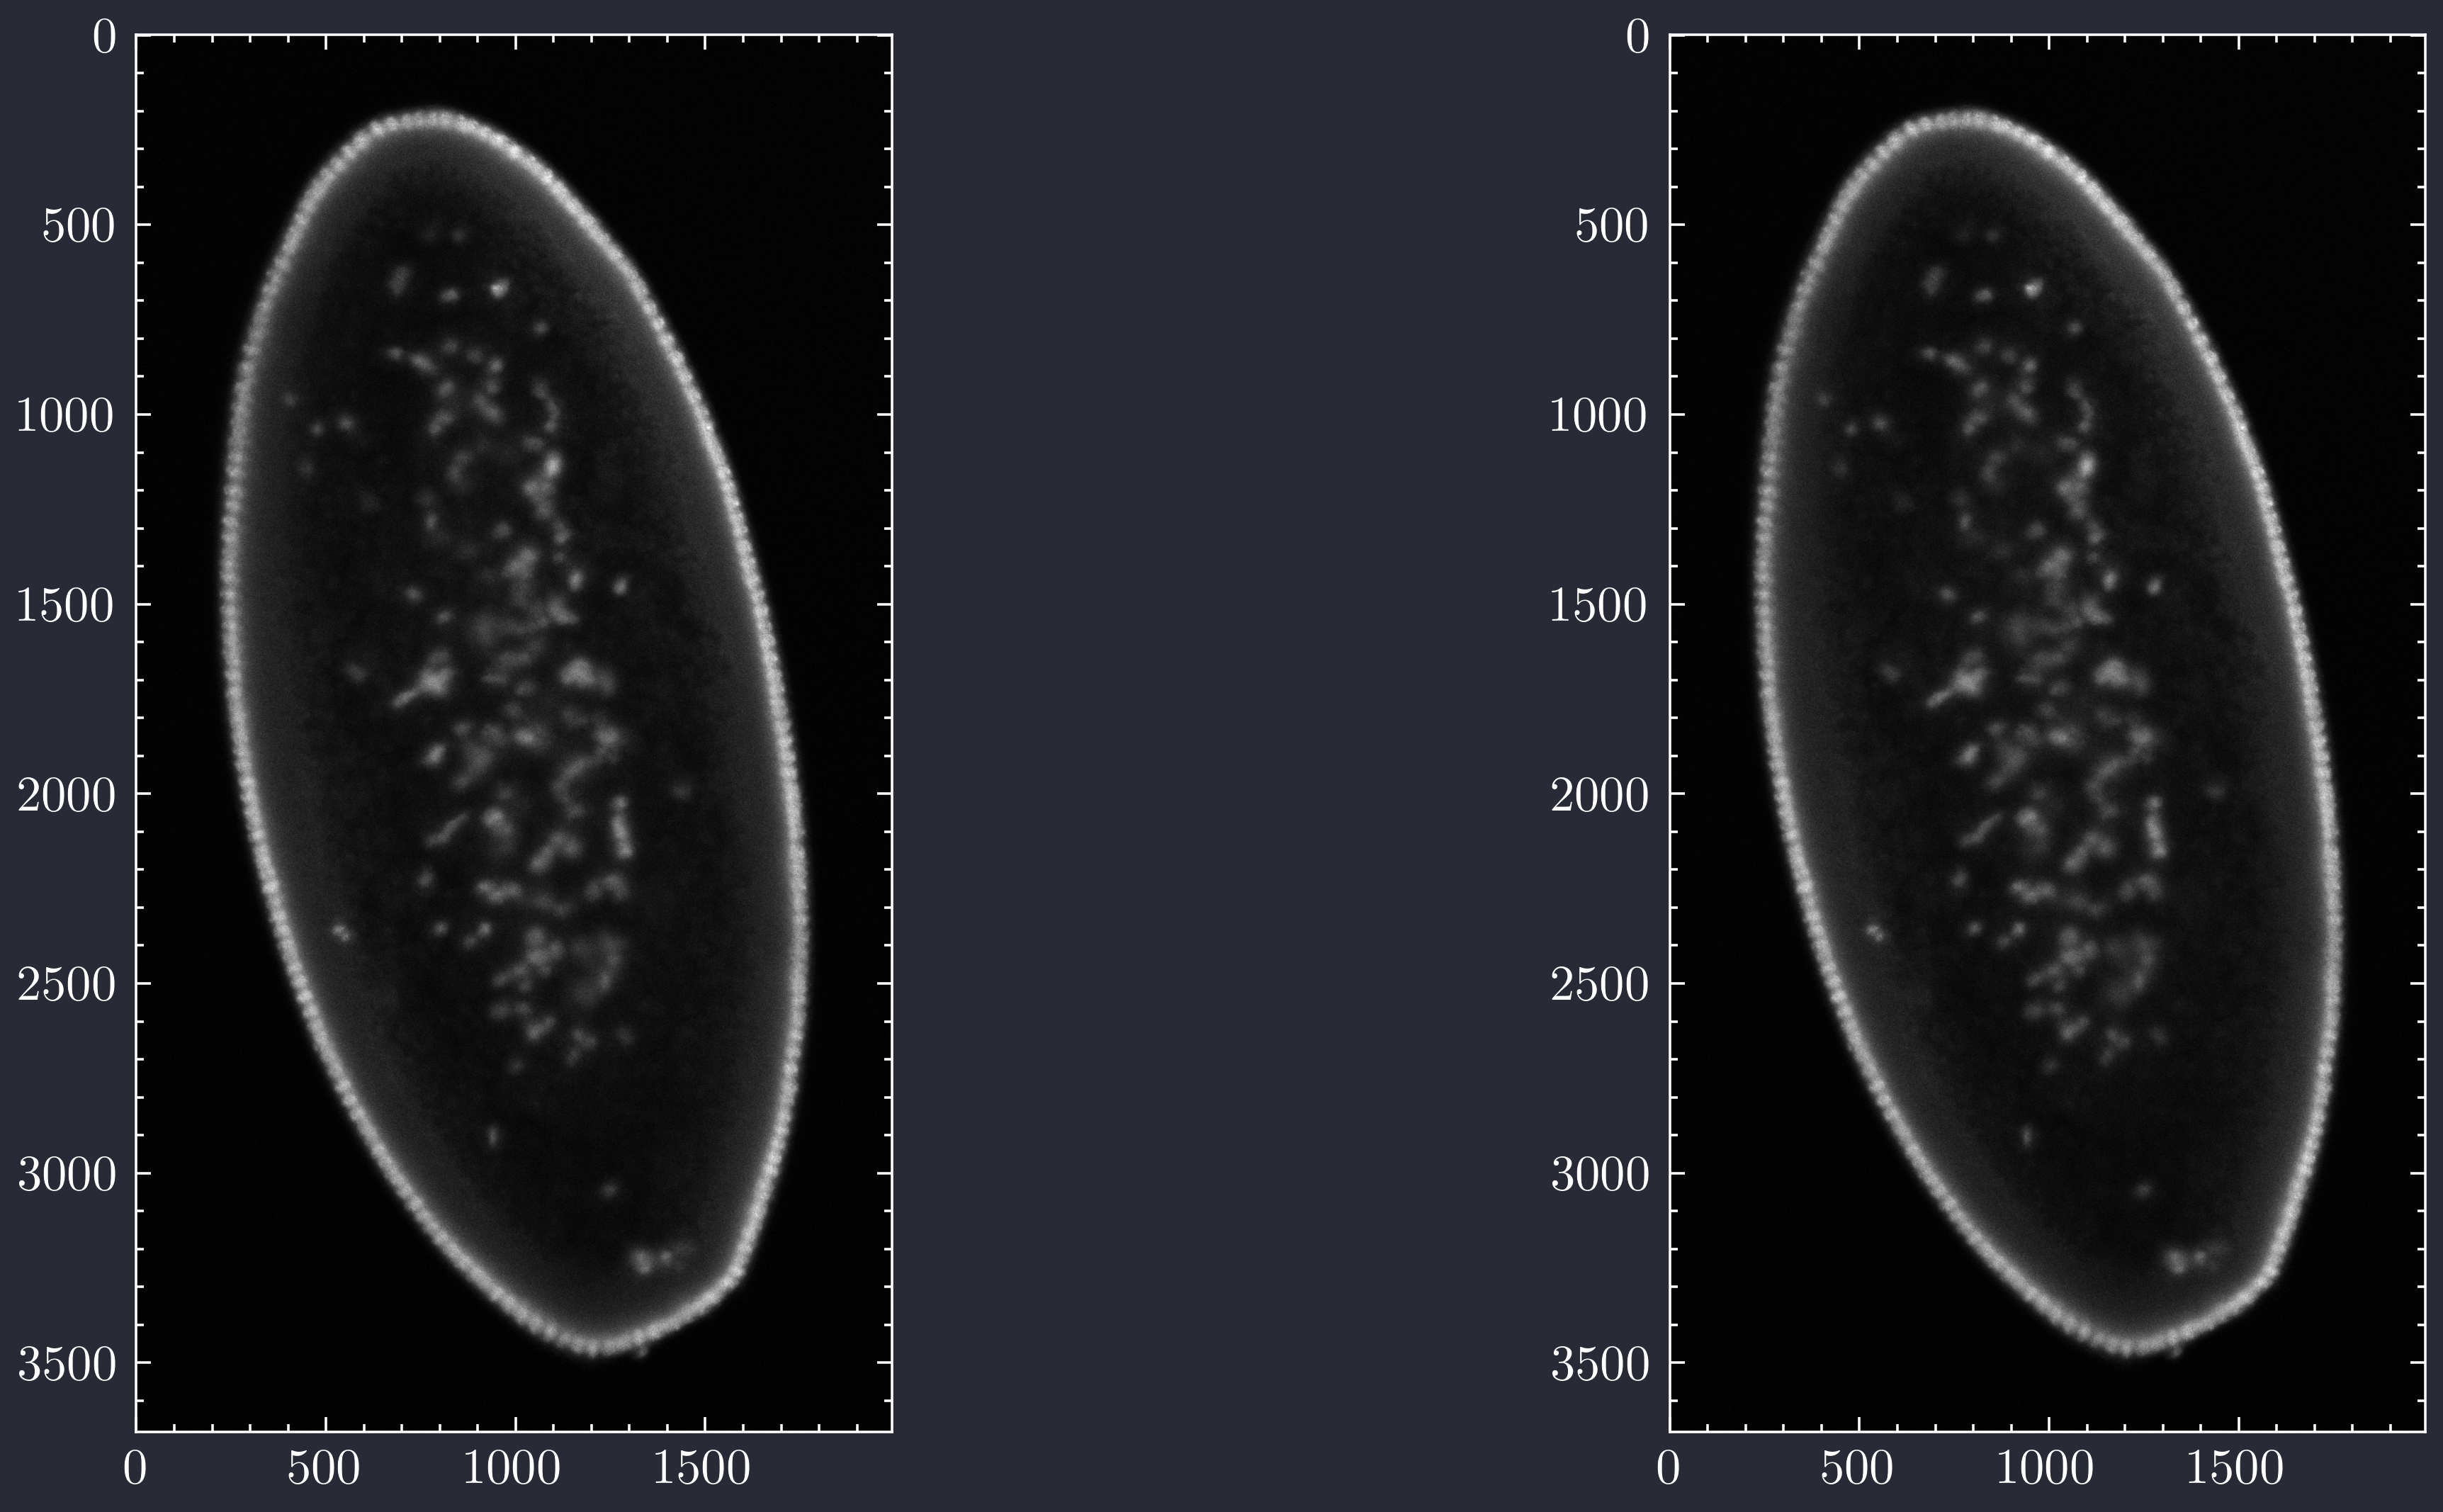

In [115]:
# draw the image for the 2 channels in grayscale
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_2bw[:, :, 1], cmap='gray')
ax[1].imshow(img_2bw[:, :, 2], cmap='gray')
plt.show()

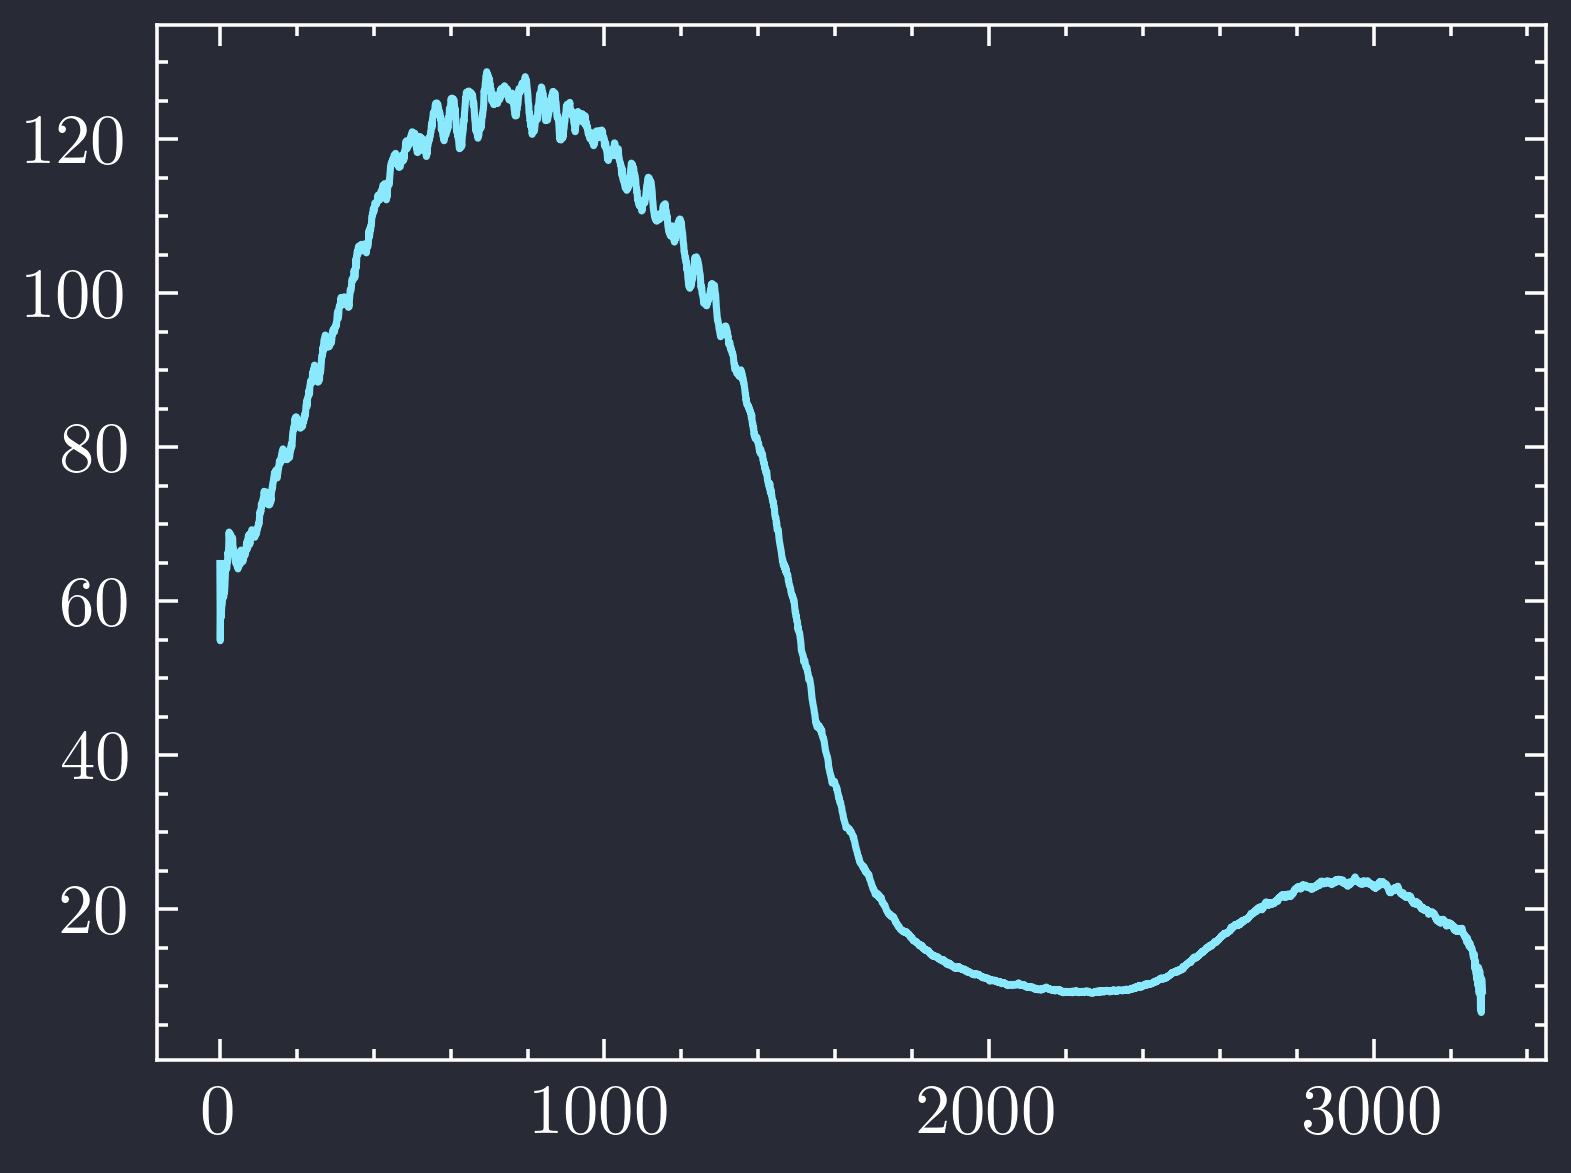

In [116]:
# Array to store left and right bounds for each row
bounds2 = []

# Iterate through each row to find the left and right bounds
for row in range(top_bound2, bottom_bound2):
    # Find left and right bounds for the current row
    left_bound = None
    right_bound = None
    for col in range(img_2bw.shape[1]):
        # check if white in left and right bounds
        if img_2bw[row, col][2] > threshold2:
            if left_bound is None:
                left_bound = col
    for col in range(img_2bw.shape[1]-1, -1, -1):
        if img_2bw[row, col][2] > threshold2:
            if right_bound is None:
                right_bound = col
    bounds2.append((left_bound, right_bound))
# bounds to numpy array
bounds2 = np.array(bounds2)
# print(bounds2)
# delete rows with no bounds
bounds2 = bounds2[np.where(bounds2[:, 0] != bounds2[:, 1])]

img_2rgb = cv.cvtColor(img_2rgb, cv.COLOR_BGR2RGB)
green_channel2 = img_2rgb[:, :, 1]
# Calculate the average green value within the bounds for each row
average_green_values2 = []
i = 0
for row in range(top_bound2, bottom_bound2-2):
    left_bound2, right_bound2 = bounds2[i]
    average_green_values2.append(np.mean(green_channel2[row, left_bound2:right_bound2]))
    i += 1

# Plot the average green values
plt.plot(average_green_values2)
plt.show()

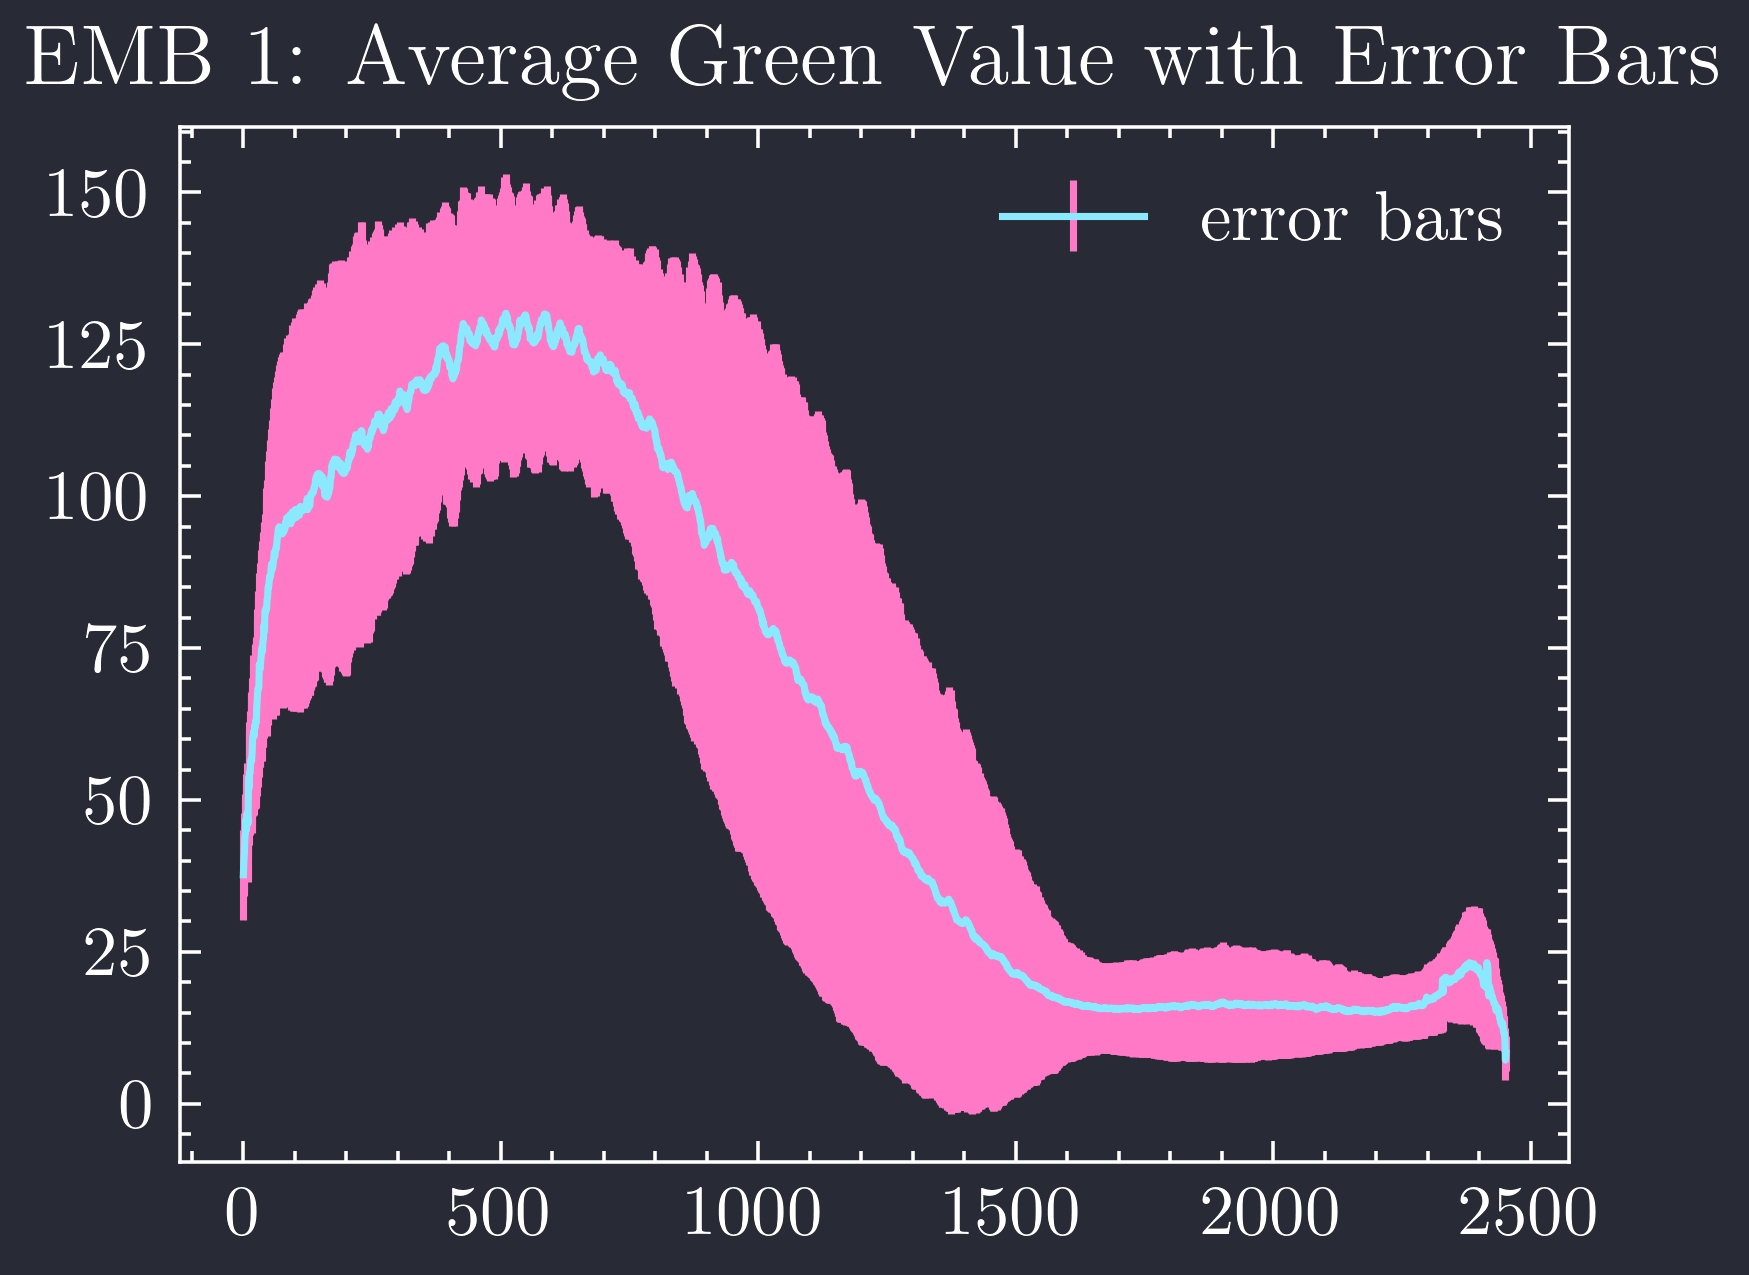

In [117]:
# error bars for emb1
std_dev1 = []
i_1 = 0
for row in range(top_bound, bottom_bound-1):
    left_bound, right_bound = bounds[i_1]
    std_dev1.append(np.std(green_channel[row, left_bound:right_bound]))
    i_1 += 1
plt.errorbar(range(len(average_green_values)), average_green_values, yerr=std_dev1, ecolor=colorcycle[1], label='error bars')
plt.title('EMB 1: Average Green Value with Error Bars')
plt.legend()
plt.show()

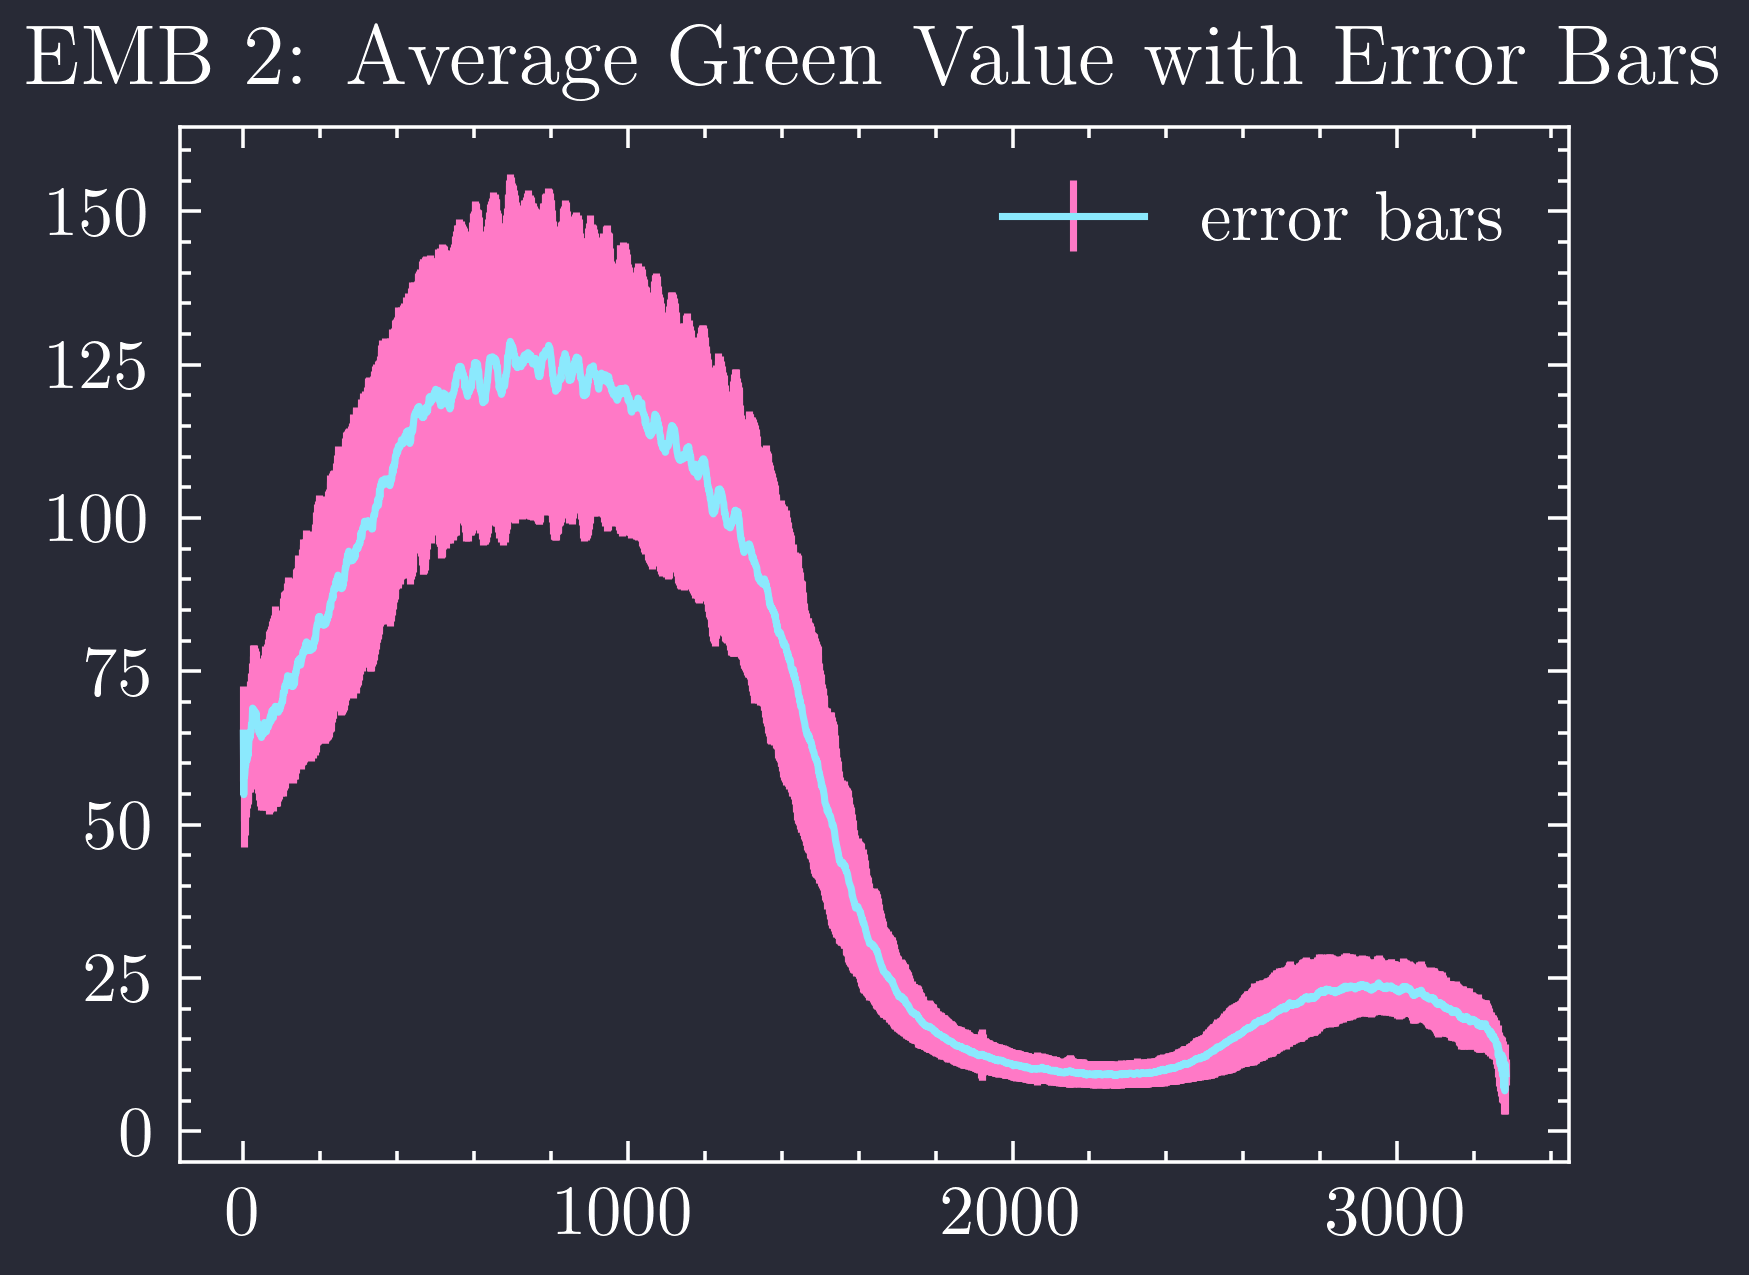

In [118]:
# print(bounds2)

# calculating error bars for emb 2
# standard deviation
std_dev2 = []
i_2 = 0
for row in range(top_bound2, bottom_bound2-2):
    left_bound2, right_bound2 = bounds2[i_2]
    std_dev2.append(np.std(green_channel2[row, left_bound2:right_bound2]))
    i_2 += 1

# print(std_dev2)
# Plot the average green values with error bars at x = 1000, 1500, 2000, 2500, 3000
plt.errorbar(range(len(average_green_values2)), average_green_values2, yerr=std_dev2, ecolor=colorcycle[1], label='error bars')
plt.title('EMB 2: Average Green Value with Error Bars')
plt.legend()
plt.show()

## Problem 3

The issues/ shortcomings:
- The largest issue comes from assuming that the embryo's long body axis is parallel to the $y$ axis. 
This issue is amplified in embryo 1, where the embryo lies on an oblique angle, and we can see this
within the error bars in the interval close to the middle of the embryo. We could improve upon this 
by either rotating the image so that the embryo is parallel to the $y$ axis, or by using a more
sophisticated method where we transform the values on to the embryo's long body axis.
- We also see some problems at the top and botttom part of the embryo, which is likely due to the
inaccuracy of the bounds for the cells body.
- There also is an arbitrary threshold to find the bounds of the embryo bodies, which are differnent
for each embryo. This inaccurately finds the bounds of the embryo which may have also resulted in
the error bars being larger than they should be. We could improve this by applying a better filter
for noise and an edge detection algorithm (e.g. Canny edge detection) to find the bounds of the embryo.

## Problem 4

We need to somehow match the $x$ values of the two embryos, and since embryo 2 is a larger array, we
will have to guess/interpolate what the $x$ values of embryo 1 would be if it were the same size. 

After we have 'normalized' the $x$ axis of the two embryos, we could possible compare the models
by taking the difference of each $y$ value at each row along the long body axis. We would expect that
this difference would be close to zero if the models are similar, and the model kind of shows this
relation (although the error bars are quite large).


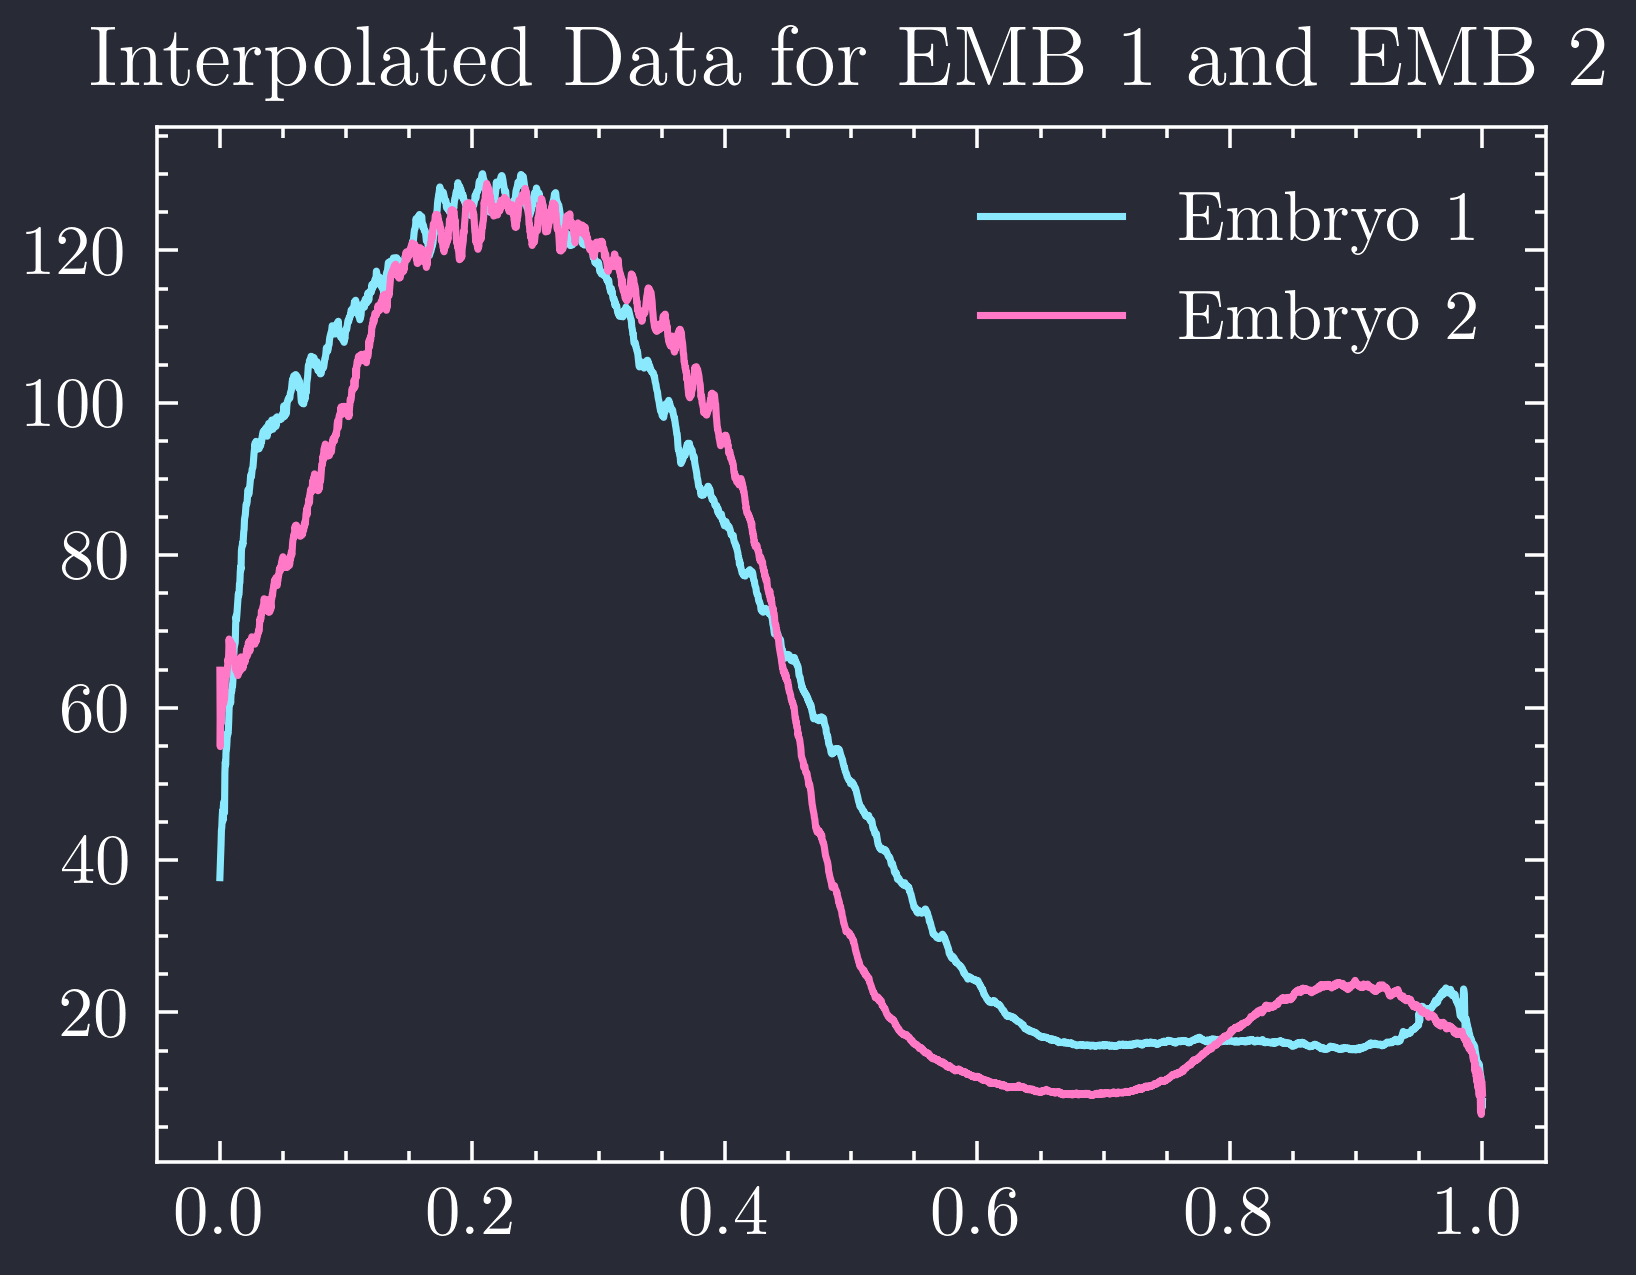

In [119]:
# turn into numpy arrays
average_green_values = np.array(average_green_values)
average_green_values2 = np.array(average_green_values2)

# turn into numpy arrays
average_green_values = np.array(average_green_values)
average_green_values2 = np.array(average_green_values2)

# determine the length of the longer array
max_len = len(average_green_values2)

# create a new x array with the length of the longer array
x = np.linspace(0, 1, max_len)

# create new x arrays for the original data
x1 = np.linspace(0, 1, len(average_green_values))
x2 = np.linspace(0, 1, len(average_green_values2))

# interpolate the data to the new x array
ynew = np.interp(x, x1, average_green_values)
ynew2 = np.interp(x, x2, average_green_values2)

# plot the interpolated data
plt.plot(x, ynew, label='Embryo 1')
plt.plot(x, ynew2, label='Embryo 2')
plt.title('Interpolated Data for EMB 1 and EMB 2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


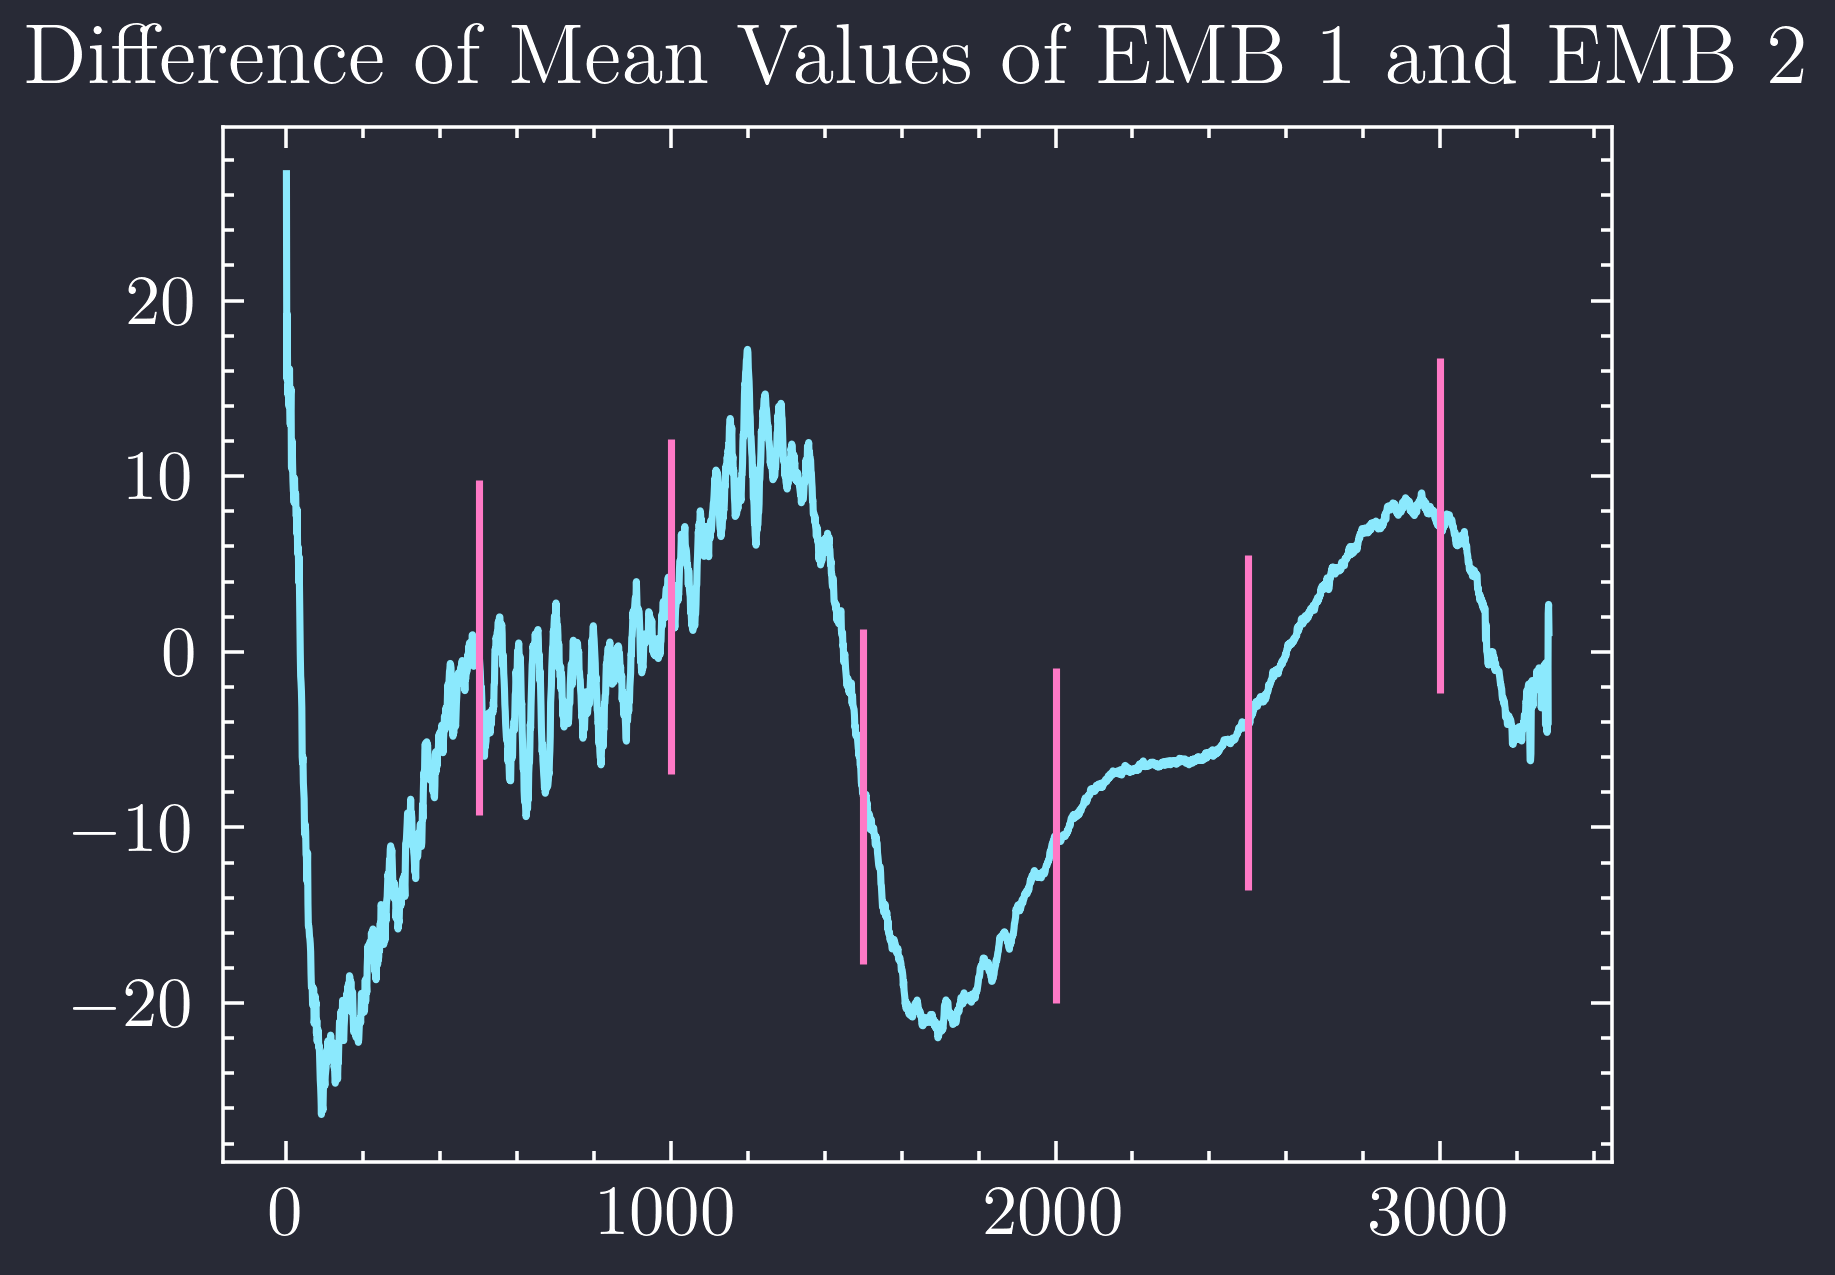

In [120]:
# Comparing profiles of EMB 1 and EMB 2 by taking the difference of mean values
diff = ynew2 - ynew

# Standard deviation of the difference
std_dev_diff = np.std(diff)
error_x = [500, 1000, 1500, 2000, 2500, 3000]
error_y = [diff[500], diff[1000], diff[1500], diff[2000], diff[2500], diff[3000]]
plt.plot(diff)
plt.title('Difference of Mean Values of EMB 1 and EMB 2')
plt.errorbar(error_x, error_y, yerr=std_dev_diff, ecolor=colorcycle[1], fmt='none')
plt.legend()
plt.show()